<a href="https://colab.research.google.com/github/nishithaNsingh/Email-Spam-Classifier_Naive_Bayes_Classifier/blob/main/Email_Spam_Classifier_Naive_Bayes_Classifier_using_Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
# Load the dataset
df = pd.read_csv('/content/mail_data.csv')

In [34]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [35]:
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [36]:
# replacing NaN values with empty strings ('') in the DataFrame df.
data = df.fillna('')

In [37]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [38]:
print(data.shape)

(5572, 2)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<ipython-input-40-11daa0b0195c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')  # Assuming the column is named 'Category'


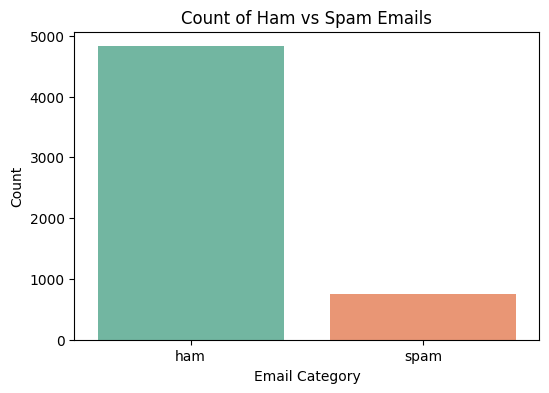

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Category', palette='Set2')  # Assuming the column is named 'Category'
plt.title('Count of Ham vs Spam Emails')
plt.xlabel('Email Category')
plt.ylabel('Count')
plt.show()

In [31]:
# Convert Categories into Numerical Values
# Map 'ham' to 1 and 'spam' to 0

data.loc[data['Category'] == 'spam', 'Category',] = 1
data.loc[data['Category'] == 'ham', 'Category',] = 0

# Convert the 'Category' column to numeric type
data['Category'] = pd.to_numeric(data['Category'])

In [11]:
#assiginging X and Y vales

X = data['Message']
y = data['Category']

In [12]:
print(X)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


In [13]:
# Convert text data to numerical features using TfidfVectorizer(Term Frequency-Inverse Document Frequency Vectorizer)
vectorizer = TfidfVectorizer(stop_words='english')
X_features = vectorizer.fit_transform(X)

In [14]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

In [15]:
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

In [16]:
# Convert sparse matrix to dense array (GaussianNB needs dense input)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [17]:
# Train the model
model.fit(X_train_dense, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_dense)

A confusion matrix might look like this:


```
[[TN, FP],
[FN, TP]]

```



Where:



1.   TN (True Negative): Correctly identified ham
2.   FP (False Positive): Ham incorrectly labeled as spam
3.   FN (False Negative): Spam incorrectly labeled as ham
4.   TP (True Positive): Correctly identified spam

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 89.42%
Confusion Matrix:
[[860 106]
 [ 12 137]]


## Predicting with ham mail

In [42]:
# Predicting the output

input_mail = ["Nah I don't think he goes to usf, he lives around here though"]  # Sample input

# Transforming the input text into features using the trained vectorizer
input_data_features = vectorizer.transform(input_mail)

# Convert sparse matrix to dense array before predicting (GaussianNB needs dense input)
input_data_dense = input_data_features.toarray()

# Making the prediction
prediction = model.predict(input_data_dense)
print(prediction)

# Output the prediction
if prediction[0] == 1:
    print("spam mail")
else:
    print("ham mail")


[0]
ham mail


## Predictong for